In [37]:
%config IPCompleter.greedy=True

In [40]:
import backtrader as bt
import backtrader.indicators as btind
import backtrader.feeds as btfeeds

class TestStrategy(bt.Strategy):
    def log(self, txt, dt=None):
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))

    def __init__(self):
        # Keep a reference to the "close" line in the data[0] dataseries
        self.dataclose = self.datas[0].close

    def next(self):
        # Simply log the closing price of the series from the reference
        self.log('Close, %.2f' % self.dataclose[0])

Starting Portfolio Value: 10000.00
2019-04-24, Close, 29.01
2019-04-25, Close, 28.59
2019-04-26, Close, 28.91
2019-04-29, Close, 29.10
2019-04-30, Close, 29.17
2019-05-01, Close, 29.01
2019-05-02, Close, 28.85
2019-05-03, Close, 28.93
2019-05-06, Close, 28.82
2019-05-07, Close, 28.77
2019-05-08, Close, 28.55
2019-05-09, Close, 28.63
2019-05-10, Close, 28.85
2019-05-13, Close, 28.71
2019-05-14, Close, 29.30
2019-05-15, Close, 29.45
2019-05-16, Close, 29.80
2019-05-17, Close, 29.96
2019-05-20, Close, 30.33
2019-05-21, Close, 30.54
2019-05-22, Close, 30.42
2019-05-23, Close, 30.29
2019-05-24, Close, 30.41
2019-05-28, Close, 30.09
2019-05-29, Close, 30.07
2019-05-30, Close, 30.02
2019-05-31, Close, 28.82
2019-06-03, Close, 29.30
2019-06-04, Close, 29.66
2019-06-05, Close, 29.85
2019-06-06, Close, 30.25
2019-06-07, Close, 30.62
2019-06-10, Close, 30.09
2019-06-11, Close, 30.26
2019-06-12, Close, 30.32
2019-06-13, Close, 30.43
2019-06-14, Close, 30.48
2019-06-17, Close, 30.44
2019-06-18, Clo

<IPython.core.display.Javascript object>


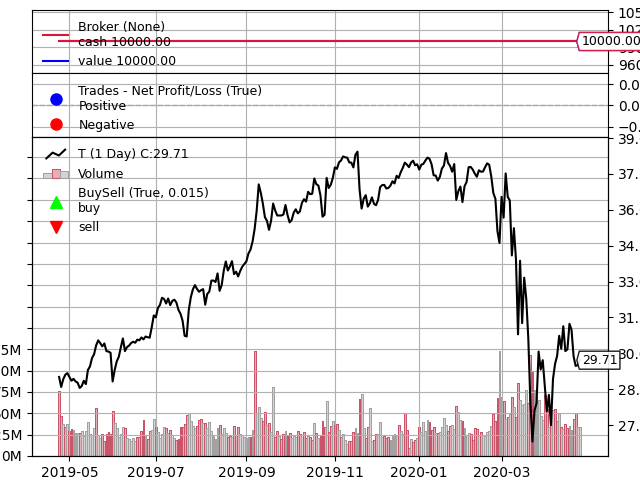

[[<Figure size 640x480 with 4 Axes>]]

In [41]:
import os
import datetime

import backtrader as bt

cerebro = bt.Cerebro()
cerebro.broker.set_cash(10000)

datapath = os.path.join(os.path.dirname(os.path.abspath('')), 'TradingBot/historical/T.csv')
data = bt.feeds.YahooFinanceCSVData(
    dataname=datapath,
    fromdate=datetime.datetime(2019, 1, 1),
    todate=datetime.datetime(2020, 12, 31),
    reverse=False)
cerebro.adddata(data)

# Add stratgey here:
cerebro.addstrategy(TestStrategy)

print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
cerebro.run()
print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())
cerebro.plot()